In [67]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [68]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [69]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [70]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [71]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [72]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [73]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [74]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [92]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
if recent_date:
    print(recent_date[0])  # Access the first element of the tuple
else:
    print("No dates found.")


2017-08-23


In [95]:
# Query to get the most recent date in the dataset
Recent_Date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

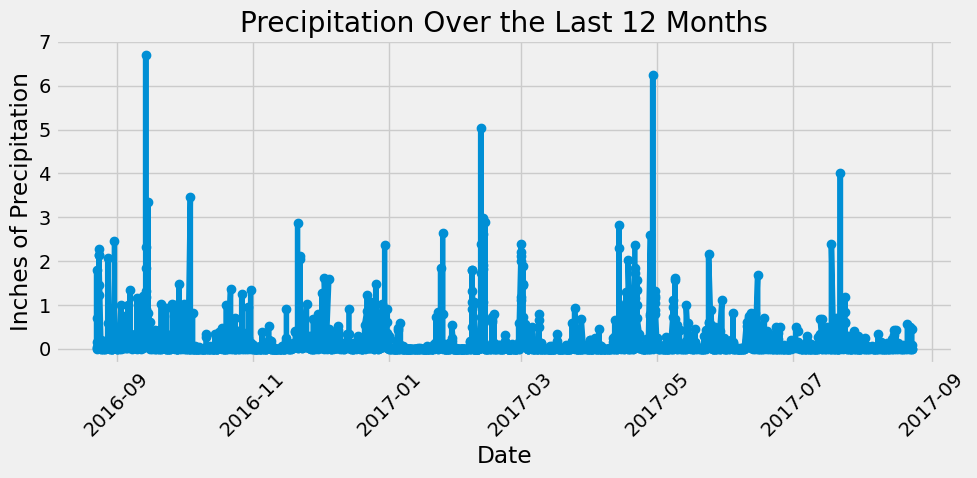

In [96]:
   # Calculate the date one year from the last date in the dataset
Last_date = dt.date(*map(int, Recent_Date[0].split('-'))) - dt.timedelta(days=365)

    # Perform a query to retrieve the data and precipitation scores
Precipitation = session.query(Measurement.date, Measurement.prcp).\
        filter(Measurement.date >= Last_date).all()

    # Save the query results as a Pandas DataFrame. Explicitly set the column names
Precipitation_df = pd.DataFrame(Precipitation, columns=['Date', 'precipitation'])

    # Sort the dataframe by date
Precipitation_df.sort_values('Date', inplace=True)

    # Convert the 'Date' column to datetime format for better plotting
Precipitation_df['Date'] = pd.to_datetime(Precipitation_df['Date'])

    # Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(10, 5))  # Adjust the figure size as needed
plt.plot(Precipitation_df['Date'], Precipitation_df['precipitation'], marker='o', linestyle='-')
plt.xlabel("Date")
plt.ylabel('Inches of Precipitation')
plt.title("Precipitation Over the Last 12 Months")
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [97]:
# Use Pandas to calculate the summary statistics for the precipitation data
Precipitation_df.describe()

,Date,precipitation
count,2230,2021.000000
mean,2017-02-16 05:31:15.874439424,0.177279
min,2016-08-23 00:00:00,0.000000
25%,2016-11-18 00:00:00,0.000000
50%,2017-02-14 12:00:00,0.020000
75%,2017-05-17 00:00:00,0.130000
max,2017-08-23 00:00:00,6.700000
std,NaN,0.461190


# Exploratory Station Analysis

In [99]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(Station.id)).scalar()  # Use .scalar() to get a single value

# Print the total number of stations
print(f"Total number of stations: {total_stations}")


Total number of stations: 9


In [102]:

# Design a query to find the most active stations (i.e., which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stn = [Measurement.station, func.count(Measurement.date)]
station_activity = session.query(*most_active_stn).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.date).desc()).all()

# Print the results
for station, count in station_activity:
    print(f"Station: {station}, Count: {count}")

Station: USC00519281, Count: 2772
Station: USC00519397, Count: 2724
Station: USC00513117, Count: 2709
Station: USC00519523, Count: 2669
Station: USC00516128, Count: 2612
Station: USC00514830, Count: 2202
Station: USC00511918, Count: 1979
Station: USC00517948, Count: 1372
Station: USC00518838, Count: 511


In [104]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# Replace 'USC00519281' with the active station id obtained from the previous query if needed
active_station_id = 'USC00519281'  # Example active station id
temperature_stats = session.query(
    func.min(Measurement.tobs),
    func.max(Measurement.tobs),
    func.avg(Measurement.tobs)
).filter(Measurement.station == active_station_id).all()

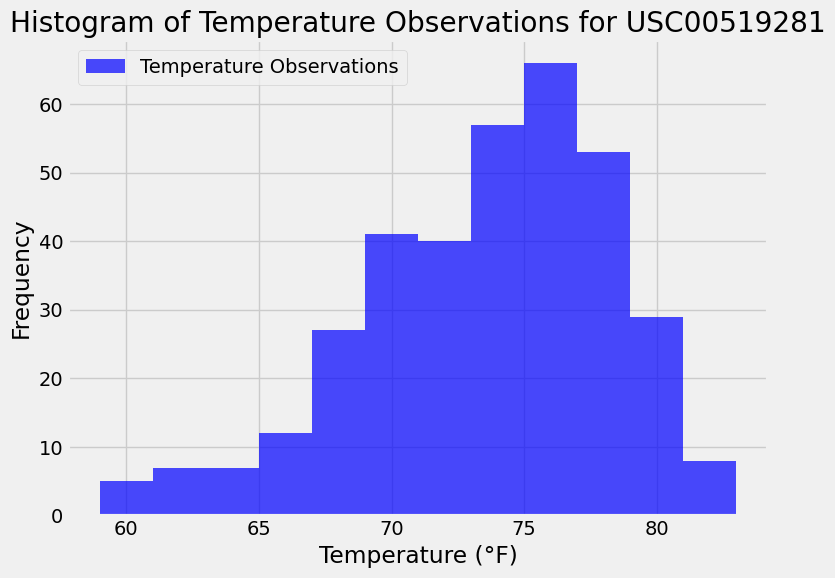

In [106]:
# Calculate the date for one year ago from the most recent date
Temp = dt.date(*map(int, Recent_Date[0].split('-'))) - dt.timedelta(days=365)

# Query the last 12 months of temperature observation data for the most active station
data = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= Temp).all()

# Convert the query results into a Pandas DataFrame
dataframe = pd.DataFrame(data, columns=['Date', 'Temperature'])

# Plot the histogram of temperature observations
plt.figure(figsize=(8, 6))
plt.hist(dataframe['Temperature'], bins=12, color='blue', alpha=0.7, label='Temperature Observations')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.title('Histogram of Temperature Observations for USC00519281')
plt.legend()
plt.tight_layout()
plt.show()

# Close Session

In [107]:
# Close Session
session.close()